# Signal development

## Generation

### Comparison

In [1]:
import vectorbtpro as vbt
import numpy as np
import pandas as pd

vbt.settings.set_theme("dark")

data = vbt.BinanceData.fetch(
    ["BTCUSDT", "ETHUSDT"], 
    start="2021-01-01",
    end="2022-01-01"
)
print(data.get("Low"))

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

symbol                      BTCUSDT  ETHUSDT
Open time                                   
2021-01-01 00:00:00+00:00  28624.57   714.29
2021-01-02 00:00:00+00:00  28946.53   714.91
2021-01-03 00:00:00+00:00  31962.99   768.71
2021-01-04 00:00:00+00:00  28130.00   890.00
2021-01-05 00:00:00+00:00  29900.00   974.45
...                             ...      ...
2021-12-27 00:00:00+00:00  50449.00  4031.00
2021-12-28 00:00:00+00:00  47313.01  3759.36
2021-12-29 00:00:00+00:00  46096.99  3604.20
2021-12-30 00:00:00+00:00  45900.00  3585.00
2021-12-31 00:00:00+00:00  45678.00  3622.29

[365 rows x 2 columns]


In [2]:
bb = vbt.talib("BBANDS").run(
    data.get("Close"),
    timeperiod=vbt.Default(14),
    nbdevup=vbt.Default(2),
    nbdevdn=vbt.Default(2)
)
print(bb.lowerband)

symbol                          BTCUSDT      ETHUSDT
Open time                                           
2021-01-01 00:00:00+00:00           NaN          NaN
2021-01-02 00:00:00+00:00           NaN          NaN
2021-01-03 00:00:00+00:00           NaN          NaN
2021-01-04 00:00:00+00:00           NaN          NaN
2021-01-05 00:00:00+00:00           NaN          NaN
...                                 ...          ...
2021-12-27 00:00:00+00:00  45408.821312  3843.990363
2021-12-28 00:00:00+00:00  45299.254073  3819.621261
2021-12-29 00:00:00+00:00  44943.280004  3712.190071
2021-12-30 00:00:00+00:00  44861.191483  3662.827659
2021-12-31 00:00:00+00:00  44882.974796  3617.893036

[365 rows x 2 columns]


In [3]:
mask = data.get("Low") < bb.lowerband
print(mask)

symbol                     BTCUSDT  ETHUSDT
Open time                                  
2021-01-01 00:00:00+00:00    False    False
2021-01-02 00:00:00+00:00    False    False
2021-01-03 00:00:00+00:00    False    False
2021-01-04 00:00:00+00:00    False    False
2021-01-05 00:00:00+00:00    False    False
...                            ...      ...
2021-12-27 00:00:00+00:00    False    False
2021-12-28 00:00:00+00:00    False     True
2021-12-29 00:00:00+00:00    False     True
2021-12-30 00:00:00+00:00    False     True
2021-12-31 00:00:00+00:00    False    False

[365 rows x 2 columns]


In [4]:
mask.sum()

symbol
BTCUSDT    53
ETHUSDT    48
dtype: int64

In [5]:
bb_mult = vbt.talib("BBANDS").run(
    data.get("Close"),
    timeperiod=vbt.Default(14),
    nbdevup=[2, 3],
    nbdevdn=[2, 3]
)
# mask = data.get("Low") < bb_mult.lowerband

In [6]:
mask = data.get("Low").vbt < bb_mult.lowerband
print(mask)

bbands_nbdevup                  2               3        
bbands_nbdevdn                  2               3        
symbol                    BTCUSDT ETHUSDT BTCUSDT ETHUSDT
Open time                                                
2021-01-01 00:00:00+00:00   False   False   False   False
2021-01-02 00:00:00+00:00   False   False   False   False
2021-01-03 00:00:00+00:00   False   False   False   False
2021-01-04 00:00:00+00:00   False   False   False   False
2021-01-05 00:00:00+00:00   False   False   False   False
...                           ...     ...     ...     ...
2021-12-27 00:00:00+00:00   False   False   False   False
2021-12-28 00:00:00+00:00   False    True   False   False
2021-12-29 00:00:00+00:00   False    True   False   False
2021-12-30 00:00:00+00:00   False    True   False   False
2021-12-31 00:00:00+00:00   False   False   False   False

[365 rows x 4 columns]


In [7]:
mask.sum()

bbands_nbdevup  bbands_nbdevdn  symbol 
2               2               BTCUSDT    53
                                ETHUSDT    48
3               3               BTCUSDT    10
                                ETHUSDT     9
dtype: int64

In [8]:
mask = bb_mult.lowerband_above(data.get("Low"))
mask.sum()

bbands_nbdevup  bbands_nbdevdn  symbol 
2               2               BTCUSDT    53
                                ETHUSDT    48
3               3               BTCUSDT    10
                                ETHUSDT     9
dtype: int64

#### Thresholds

In [9]:
bandwidth = (bb.upperband - bb.lowerband) / bb.middleband

mask = bandwidth.vbt > pd.Index([0.15, 0.3], name="threshold")
mask.sum()

threshold  symbol 
0.15       BTCUSDT    253
           ETHUSDT    316
0.30       BTCUSDT     65
           ETHUSDT    136
dtype: int64

In [10]:
mask = bandwidth.vbt.combine(
    [0.15, 0.3],
    combine_func=np.greater, 
    keys=pd.Index([0.15, 0.3], name="threshold")
)
mask.sum()

threshold  symbol 
0.15       BTCUSDT    253
           ETHUSDT    316
0.30       BTCUSDT     65
           ETHUSDT    136
dtype: int64

In [11]:
mask = pd.concat(
    (bandwidth > 0.15, bandwidth > 0.3), 
    keys=pd.Index([0.15, 0.3], name="threshold"), 
    axis=1
)
mask.sum()

threshold  symbol 
0.15       BTCUSDT    253
           ETHUSDT    316
0.30       BTCUSDT     65
           ETHUSDT    136
dtype: int64

#### Crossovers

In [12]:
low_below_lband = data.get("Low") < bb.lowerband
mask = low_below_lband.vbt.signals.first()
mask.sum()

symbol
BTCUSDT    21
ETHUSDT    20
dtype: int64

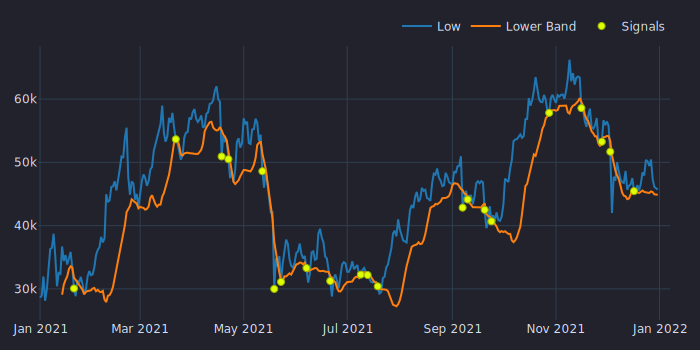

In [13]:
btc_low = data.get("Low", "BTCUSDT").rename("Low")
btc_lowerband = bb.lowerband["BTCUSDT"].rename("Lower Band")
btc_mask = mask["BTCUSDT"].rename("Signals")

fig = btc_low.vbt.plot()
btc_lowerband.vbt.plot(fig=fig)
btc_mask.vbt.signals.plot_as_markers(
    y=btc_low, 
    trace_kwargs=dict(
        marker=dict(
            color="#DFFF00"
        )
    ),
    fig=fig
).show_svg()

In [14]:
mask = low_below_lband.vbt.signals.first(after_false=True)
mask.sum()

symbol
BTCUSDT    21
ETHUSDT    20
dtype: int64

In [15]:
sample_low = pd.Series([10, 9, 8, 9, 8])
sample_lband = pd.Series([np.nan, np.nan, 9, 8, 9])
sample_mask = sample_low < sample_lband
sample_mask.vbt.signals.first(after_false=True)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [16]:
sample_mask[sample_lband.ffill().isnull()] = True
sample_mask.vbt.signals.first(after_false=True)

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [17]:
buffer = sample_lband.ffill().isnull().sum(axis=0).max()
buffer

2

In [18]:
sample_buf_mask = sample_low.iloc[buffer:] < sample_lband.iloc[buffer:]
sample_buf_mask = sample_buf_mask.vbt.signals.first(after_false=True)
sample_mask = sample_low.vbt.wrapper.fill(False)
sample_mask.loc[sample_buf_mask.index] = sample_buf_mask
sample_mask

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [19]:
mask = data.get("Low").vbt.crossed_below(bb.lowerband, wait=1)
mask.sum()

symbol
BTCUSDT    15
ETHUSDT    11
dtype: int64

In [20]:
mask = bb.lowerband_crossed_above(data.get("Low"), wait=1)
mask.sum()

symbol
BTCUSDT    15
ETHUSDT    11
dtype: int64

### Logical operators

In [21]:
cond1 = data.get("Low") < bb.lowerband
cond2 = bandwidth > 0.3
cond3 = data.get("High") > bb.upperband
cond4 = bandwidth < 0.15

mask = (cond1 & cond2) | (cond3 & cond4)
mask.sum()

symbol
BTCUSDT    25
ETHUSDT    13
dtype: int64

In [22]:
cond1 = data.get("Low").vbt < bb.lowerband
cond2 = bandwidth.vbt > pd.Index([0.3, 0.3, 0.4, 0.4], name="cond2_th")
cond3 = data.get("High").vbt > bb.upperband
cond4 = bandwidth.vbt < pd.Index([0.1, 0.2, 0.1, 0.2], name="cond4_th")

mask = (cond1.vbt & cond2).vbt | (cond3.vbt & cond4)
mask.sum()

cond2_th  cond4_th  symbol 
0.3       0.1       BTCUSDT    11
                    ETHUSDT    10
          0.2       BTCUSDT    28
                    ETHUSDT    27
0.4       0.1       BTCUSDT     9
                    ETHUSDT     5
          0.2       BTCUSDT    26
                    ETHUSDT    22
dtype: int64

In [23]:
cond1 = data.get("Low").vbt < bb.lowerband
cond2 = bandwidth.vbt > pd.Index([0.3, 0.4], name="cond2_th")
cond3 = data.get("High").vbt > bb.upperband
cond4 = bandwidth.vbt < pd.Index([0.1, 0.2], name="cond4_th")

In [24]:
i1 = np.split(np.arange(len(cond1.columns)), len(cond1.columns) // 2)
i2 = np.split(np.arange(len(cond2.columns)), len(cond2.columns) // 2)
i3 = np.split(np.arange(len(cond3.columns)), len(cond3.columns) // 2)
i4 = np.split(np.arange(len(cond4.columns)), len(cond4.columns) // 2)

In [25]:
print(i1)
print(i2)
print(i3)
print(i4)

[array([0, 1])]
[array([0, 1]), array([2, 3])]
[array([0, 1])]
[array([0, 1]), array([2, 3])]


In [26]:
from itertools import product

i1, i2, i3, i4 = zip(*product(i1, i2, i3, i4))

In [27]:
print(i1)
print(i2)
print(i3)
print(i4)

(array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]))
(array([0, 1]), array([0, 1]), array([2, 3]), array([2, 3]))
(array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]))
(array([0, 1]), array([2, 3]), array([0, 1]), array([2, 3]))


In [28]:
i1 = np.asarray(i1).flatten()
i2 = np.asarray(i2).flatten()
i3 = np.asarray(i3).flatten()
i4 = np.asarray(i4).flatten()

In [29]:
print(i1)
print(i2)
print(i3)
print(i4)

[0 1 0 1 0 1 0 1]
[0 1 0 1 2 3 2 3]
[0 1 0 1 0 1 0 1]
[0 1 2 3 0 1 2 3]


In [30]:
cond1 = cond1.iloc[:, i1]
cond2 = cond2.iloc[:, i2]
cond3 = cond3.iloc[:, i3]
cond4 = cond4.iloc[:, i4]

In [31]:
mask = (cond1.vbt & cond2).vbt | (cond3.vbt & cond4)
mask.sum()

cond2_th  cond4_th  symbol 
0.3       0.1       BTCUSDT    11
                    ETHUSDT    10
          0.2       BTCUSDT    28
                    ETHUSDT    27
0.4       0.1       BTCUSDT     9
                    ETHUSDT     5
          0.2       BTCUSDT    26
                    ETHUSDT    22
dtype: int64

In [32]:
MaskGenerator = vbt.IF.from_expr("""
upperband, middleband, lowerband = @res_talib_bbands
bandwidth = (upperband - lowerband) / middleband
cond1 = low < lowerband
cond2 = bandwidth > @p_cond2_th
cond3 = high > upperband
cond4 = bandwidth < @p_cond4_th
@out_mask:(cond1 & cond2) | (cond3 & cond4)
""")

print(vbt.format_func(MaskGenerator.run, incl_doc=False))

Indicator.run(
    high,
    low,
    close,
    cond2_th,
    cond4_th,
    bbands_timeperiod=Default(value=5),
    bbands_nbdevup=Default(value=2),
    bbands_nbdevdn=Default(value=2),
    bbands_matype=Default(value=0),
    bbands_timeframe=Default(value=None),
    short_name='custom',
    hide_params=None,
    hide_default=True,
    **kwargs
)


In [33]:
mask_generator = MaskGenerator.run(
    high=data.get("High"),
    low=data.get("Low"),
    close=data.get("Close"),
    cond2_th=[0.3, 0.4],
    cond4_th=[0.1, 0.2],
    bbands_timeperiod=vbt.Default(14),
    param_product=True
)
mask_generator.mask.sum()

custom_cond2_th  custom_cond4_th  symbol 
0.3              0.1              BTCUSDT    11
                                  ETHUSDT    10
                 0.2              BTCUSDT    28
                                  ETHUSDT    27
0.4              0.1              BTCUSDT     9
                                  ETHUSDT     5
                 0.2              BTCUSDT    26
                                  ETHUSDT    22
dtype: int64

### Shifting

In [34]:
cond1 = data.get("Low") < bb.lowerband
cond2 = bandwidth > bandwidth.shift(1)

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    42
ETHUSDT    39
dtype: int64

In [35]:
cond2 = bandwidth > bandwidth.rolling("7d").apply(lambda x: x[0])

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    33
ETHUSDT    28
dtype: int64

In [36]:
def exactly_ago(sr):
    if sr.index[0] == sr.index[-1] - pd.Timedelta("7d"):
        return sr.iloc[0]
    return np.nan

cond_7d_ago = bandwidth.rolling("8d").apply(exactly_ago, raw=False)
cond2 = bandwidth > cond_7d_ago

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    29
ETHUSDT    26
dtype: int64

In [37]:
from numba import njit

@njit
def exactly_ago_meta_nb(from_i, to_i, col, index, freq, arr):
    if index[from_i] == index[to_i - 1] - freq:
        return arr[from_i, col]
    return np.nan

cond_7d_ago = vbt.pd_acc.rolling_apply(
    "8d",
    exactly_ago_meta_nb,
    bandwidth.index.values,
    pd.Timedelta("7d").to_timedelta64(),
    vbt.to_2d_array(bandwidth),
    wrapper=bandwidth.vbt.wrapper
)
cond2 = bandwidth > cond_7d_ago

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    29
ETHUSDT    26
dtype: int64

In [38]:
cond2 = bandwidth > bandwidth.vbt.ago("7d")

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    29
ETHUSDT    26
dtype: int64

In [39]:
bandwidth.iloc[-8]

symbol
BTCUSDT    0.125477
ETHUSDT    0.096458
Name: 2021-12-24 00:00:00+00:00, dtype: float64

In [40]:
bandwidth.vbt.ago("7d").iloc[-1]

symbol
BTCUSDT    0.125477
ETHUSDT    0.096458
Name: 2021-12-31 00:00:00+00:00, dtype: float64

### Truth value testing

In [41]:
cond2 = data.get("Close").vbt.crossed_below(bb.middleband)
cond2 = cond2.rolling(5, min_periods=1).max().astype(bool)

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    36
ETHUSDT    28
dtype: int64

In [42]:
cond2 = data.get("Close").vbt.crossed_below(bb.middleband)
cond2 = cond2.vbt.rolling_any(5)

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    36
ETHUSDT    28
dtype: int64

In [43]:
cond2 = data.get("Close").vbt.crossed_below(bb.middleband)
cond2 = cond2.vbt.rolling_apply(
    "W", "any", 
    minp=1, 
    wrap_kwargs=dict(fillna=0, dtype=bool)
)

mask = cond1 & cond2
mask.sum()

symbol
BTCUSDT    43
ETHUSDT    37
dtype: int64

In [44]:
anchor_points = data.wrapper.get_index_points(
    every="MS", 
    start=0, 
    exact_start=True
)
anchor_points

array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334])

In [45]:
left_bound = np.full(len(data.wrapper.index), np.nan)
left_bound[anchor_points] = anchor_points
left_bound = vbt.nb.ffill_1d_nb(left_bound).astype(np.int64)
left_bound = bandwidth.index[left_bound]
left_bound

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               '2021-01-01 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               '2021-01-01 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               '2021-01-01 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               '2021-01-01 00:00:00+00:00', '2021-01-01 00:00:00+00:00',
               ...
               '2021-12-01 00:00:00+00:00', '2021-12-01 00:00:00+00:00',
               '2021-12-01 00:00:00+00:00', '2021-12-01 00:00:00+00:00',
               '2021-12-01 00:00:00+00:00', '2021-12-01 00:00:00+00:00',
               '2021-12-01 00:00:00+00:00', '2021-12-01 00:00:00+00:00',
               '2021-12-01 00:00:00+00:00', '2021-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=365, freq=None)

In [46]:
right_bound = data.wrapper.index
right_bound

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-02 00:00:00+00:00',
               '2021-01-03 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-05 00:00:00+00:00', '2021-01-06 00:00:00+00:00',
               '2021-01-07 00:00:00+00:00', '2021-01-08 00:00:00+00:00',
               '2021-01-09 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               ...
               '2021-12-22 00:00:00+00:00', '2021-12-23 00:00:00+00:00',
               '2021-12-24 00:00:00+00:00', '2021-12-25 00:00:00+00:00',
               '2021-12-26 00:00:00+00:00', '2021-12-27 00:00:00+00:00',
               '2021-12-28 00:00:00+00:00', '2021-12-29 00:00:00+00:00',
               '2021-12-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=365, freq='D')

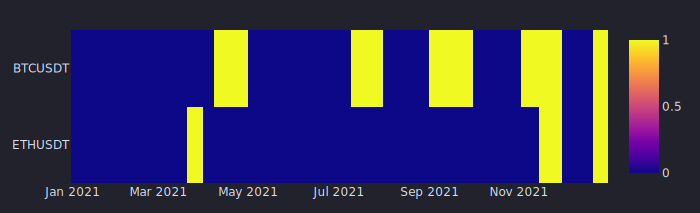

In [47]:
mask = (bandwidth <= 0.1).vbt.resample_between_bounds(
    left_bound, 
    right_bound,
    "any",
    closed_lbound=True,
    closed_rbound=True,
    wrap_with_lbound=False,
    wrap_kwargs=dict(fillna=0, dtype=bool)
)
mask.astype(int).vbt.ts_heatmap().show_svg()

### Periodically

In [48]:
min_data = vbt.BinanceData.fetch(
    ["BTCUSDT", "ETHUSDT"], 
    start="2021-01-01 UTC",
    end="2021-02-01 UTC",
    timeframe="1h"
)
index = min_data.wrapper.index
tuesday_index = index[index.weekday == 1]
tuesday_index

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DatetimeIndex(['2021-01-05 00:00:00+00:00', '2021-01-05 01:00:00+00:00',
               '2021-01-05 02:00:00+00:00', '2021-01-05 03:00:00+00:00',
               '2021-01-05 04:00:00+00:00', '2021-01-05 05:00:00+00:00',
               '2021-01-05 06:00:00+00:00', '2021-01-05 07:00:00+00:00',
               '2021-01-05 08:00:00+00:00', '2021-01-05 09:00:00+00:00',
               '2021-01-05 10:00:00+00:00', '2021-01-05 11:00:00+00:00',
               '2021-01-05 12:00:00+00:00', '2021-01-05 13:00:00+00:00',
               '2021-01-05 14:00:00+00:00', '2021-01-05 15:00:00+00:00',
               '2021-01-05 16:00:00+00:00', '2021-01-05 17:00:00+00:00',
               '2021-01-05 18:00:00+00:00', '2021-01-05 19:00:00+00:00',
               '2021-01-05 20:00:00+00:00', '2021-01-05 21:00:00+00:00',
               '2021-01-05 22:00:00+00:00', '2021-01-05 23:00:00+00:00',
               '2021-01-12 00:00:00+00:00', '2021-01-12 01:00:00+00:00',
               '2021-01-12 02:00:00+00:00', '2021-0

In [49]:
tuesday_1800_index = tuesday_index[tuesday_index.hour == 18]
tuesday_1800_index

DatetimeIndex(['2021-01-05 18:00:00+00:00', '2021-01-12 18:00:00+00:00',
               '2021-01-19 18:00:00+00:00', '2021-01-26 18:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [50]:
tuesday_1730_index = index[
    (index.weekday == 1) & 
    (index.hour == 17) & 
    (index.minute == 30)
]
tuesday_1730_index

DatetimeIndex([], dtype='datetime64[ns, UTC]', name='Open time', freq='H')

In [51]:
index.get_indexer([pd.Timestamp("2021-01-07", tz=index.tz)])

array([144])

In [52]:
index.get_indexer([pd.Timestamp("2021-01-07 17:30:00", tz=index.tz)]) 

array([-1])

In [53]:
index[index.get_indexer(
    [pd.Timestamp("2021-01-07 17:30:00", tz=index.tz)],
    method="ffill"
)]

DatetimeIndex(['2021-01-07 17:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [54]:
index[index.get_indexer(
    [pd.Timestamp("2021-01-07 17:30:00", tz=index.tz)],
    method="bfill"
)]

DatetimeIndex(['2021-01-07 18:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [55]:
each_tuesday = pd.date_range(index[0], index[-1], freq="W-TUE")
each_tuesday_1730 = each_tuesday + pd.Timedelta(hours=17, minutes=30)
each_tuesday_1730

DatetimeIndex(['2021-01-05 17:30:00+00:00', '2021-01-12 17:30:00+00:00',
               '2021-01-19 17:30:00+00:00', '2021-01-26 17:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [56]:
positions = index.get_indexer(each_tuesday_1730, method="bfill")

min_symbol_wrapper = min_data.get_symbol_wrapper()
mask = min_symbol_wrapper.fill(False)
mask.iloc[positions] = True
mask.sum()

symbol
BTCUSDT    4
ETHUSDT    4
dtype: int64

In [57]:
mask[mask.any(axis=1)].index.strftime("%A %T")

Index(['Tuesday 18:00:00', 'Tuesday 18:00:00', 'Tuesday 18:00:00',
       'Tuesday 18:00:00'],
      dtype='object', name='Open time')

In [58]:
tuesday_after_1700 = (index.weekday == 1) & (index.hour >= 17)
wednesday_before_1700 = (index.weekday == 2) & (index.hour < 17)
main_cond = tuesday_after_1700 | wednesday_before_1700
mask = min_symbol_wrapper.fill(False)
mask[main_cond] = True
mask = mask.vbt.signals.first()
mask[mask.any(axis=1)].index.strftime("%A %T")

Index(['Tuesday 17:00:00', 'Tuesday 17:00:00', 'Tuesday 17:00:00',
       'Tuesday 17:00:00'],
      dtype='object', name='Open time')

In [59]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set(
    True, 
    every="W-TUE", 
    at_time="17:30", 
    inplace=True
)
mask[mask.any(axis=1)].index.strftime("%A %T")

Index(['Tuesday 18:00:00', 'Tuesday 18:00:00', 'Tuesday 18:00:00',
       'Tuesday 18:00:00'],
      dtype='object', name='Open time')

In [60]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set(
    True, 
    every="W-TUE", 
    at_time="18:00", 
    add_delta=pd.Timedelta(1, "ns"),
    inplace=True
)
mask[mask.any(axis=1)].index.strftime("%A %T")

Index(['Tuesday 19:00:00', 'Tuesday 19:00:00', 'Tuesday 19:00:00',
       'Tuesday 19:00:00'],
      dtype='object', name='Open time')

In [61]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set_between(
    True, 
    every="W-MON", 
    start_time="12:00", 
    end_time="17:00", 
    add_end_delta=pd.Timedelta(days=1),
    inplace=True
)
mask[mask.any(axis=1)].index.strftime("%A %T")

Index(['Monday 12:00:00', 'Monday 13:00:00', 'Monday 14:00:00',
       'Monday 15:00:00', 'Monday 16:00:00', 'Monday 17:00:00',
       'Monday 18:00:00', 'Monday 19:00:00', 'Monday 20:00:00',
       'Monday 21:00:00',
       ...
       'Tuesday 07:00:00', 'Tuesday 08:00:00', 'Tuesday 09:00:00',
       'Tuesday 10:00:00', 'Tuesday 11:00:00', 'Tuesday 12:00:00',
       'Tuesday 13:00:00', 'Tuesday 14:00:00', 'Tuesday 15:00:00',
       'Tuesday 16:00:00'],
      dtype='object', name='Open time', length=116)

In [62]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set(
    True, 
    on="January 7th 2021 UTC",
    indexer_method=None,
    inplace=True
)
mask[mask.any(axis=1)].index

DatetimeIndex(['2021-01-07 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Open time', freq='H')

In [63]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set_between(
    True, 
    start=["2021-01-01 12:00:00", "2021-01-07 12:00:00"],
    end=["2021-01-02 12:00:00", "2021-01-08 12:00:00"],
    inplace=True
)
mask[mask.any(axis=1)].index

DatetimeIndex(['2021-01-01 12:00:00+00:00', '2021-01-01 13:00:00+00:00',
               '2021-01-01 14:00:00+00:00', '2021-01-01 15:00:00+00:00',
               '2021-01-01 16:00:00+00:00', '2021-01-01 17:00:00+00:00',
               '2021-01-01 18:00:00+00:00', '2021-01-01 19:00:00+00:00',
               '2021-01-01 20:00:00+00:00', '2021-01-01 21:00:00+00:00',
               '2021-01-01 22:00:00+00:00', '2021-01-01 23:00:00+00:00',
               '2021-01-02 00:00:00+00:00', '2021-01-02 01:00:00+00:00',
               '2021-01-02 02:00:00+00:00', '2021-01-02 03:00:00+00:00',
               '2021-01-02 04:00:00+00:00', '2021-01-02 05:00:00+00:00',
               '2021-01-02 06:00:00+00:00', '2021-01-02 07:00:00+00:00',
               '2021-01-02 08:00:00+00:00', '2021-01-02 09:00:00+00:00',
               '2021-01-02 10:00:00+00:00', '2021-01-02 11:00:00+00:00',
               '2021-01-07 12:00:00+00:00', '2021-01-07 13:00:00+00:00',
               '2021-01-07 14:00:00+00:00', '2021-0

In [64]:
mask = min_symbol_wrapper.fill(False)
mask.vbt.set_between(
    True, 
    every="W-MON",
    split_every=False,
    add_end_delta="2h",
    inplace=True
)
mask[mask.any(axis=1)].index

DatetimeIndex(['2021-01-04 00:00:00+00:00', '2021-01-04 01:00:00+00:00',
               '2021-01-11 00:00:00+00:00', '2021-01-11 01:00:00+00:00',
               '2021-01-18 00:00:00+00:00', '2021-01-18 01:00:00+00:00',
               '2021-01-25 00:00:00+00:00', '2021-01-25 01:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

### Iteratively

In [65]:
@njit
def generate_mask_1d_nb(
    high, low,
    uband, mband, lband,
    cond2_th, cond4_th
):
    out = np.full(high.shape, False)
    
    for i in range(high.shape[0]):

      
        bandwidth = (uband[i] - lband[i]) / mband[i]
        cond1 = low[i] < lband[i]
        cond2 = bandwidth > cond2_th
        cond3 = high[i] > uband[i]
        cond4 = bandwidth < cond4_th
        signal = (cond1 and cond2) or (cond3 and cond4)
        
        out[i] = signal
        
    return out

mask = generate_mask_1d_nb(
    data.get("High")["BTCUSDT"].values,
    data.get("Low")["BTCUSDT"].values,
    bb.upperband["BTCUSDT"].values,
    bb.middleband["BTCUSDT"].values,
    bb.lowerband["BTCUSDT"].values,
    0.30,
    0.15
)
symbol_wrapper = data.get_symbol_wrapper()
mask = symbol_wrapper["BTCUSDT"].wrap(mask)
mask.sum()

25

In [66]:
@njit
def generate_mask_nb(
    high, low,
    uband, mband, lband,
    cond2_th, cond4_th
):
    out = np.empty(high.shape, dtype=np.bool_)
    
    for col in range(high.shape[1]):
        out[:, col] = generate_mask_1d_nb(
            high[:, col], low[:, col],
            uband[:, col], mband[:, col], lband[:, col],
            cond2_th, cond4_th
        )
        
    return out

mask = generate_mask_nb(
    vbt.to_2d_array(data.get("High")),
    vbt.to_2d_array(data.get("Low")),
    vbt.to_2d_array(bb.upperband),
    vbt.to_2d_array(bb.middleband),
    vbt.to_2d_array(bb.lowerband),
    0.30,
    0.15
)
mask = symbol_wrapper.wrap(mask)
mask.sum()

symbol
BTCUSDT    25
ETHUSDT    13
dtype: int64

In [67]:
MaskGenerator = vbt.IF(
    input_names=["high", "low", "uband", "mband", "lband"],
    param_names=["cond2_th", "cond4_th"],
    output_names=["mask"]
).with_apply_func(generate_mask_1d_nb, takes_1d=True)
mask_generator = MaskGenerator.run(
    data.get("High"),
    data.get("Low"),
    bb.upperband,
    bb.middleband,
    bb.lowerband,
    [0.3, 0.4],
    [0.1, 0.2],
    param_product=True
)
mask_generator.mask.sum()

custom_cond2_th  custom_cond4_th  symbol 
0.3              0.1              BTCUSDT    11
                                  ETHUSDT    10
                 0.2              BTCUSDT    28
                                  ETHUSDT    27
0.4              0.1              BTCUSDT     9
                                  ETHUSDT     5
                 0.2              BTCUSDT    26
                                  ETHUSDT    22
dtype: int64

In [68]:
@njit
def value_ago_1d_nb(arr, ago):
    out = np.empty(arr.shape, dtype=np.float_)
    for i in range(out.shape[0]):
        if i - ago >= 0:
            out[i] = arr[i - ago]
        else:
            out[i] = np.nan
    return out

arr = np.array([1, 2, 3])
value_ago_1d_nb(arr, 1)

array([nan,  1.,  2.])

In [69]:
@njit
def any_in_window_1d_nb(arr, window):
    out = np.empty(arr.shape, dtype=np.bool_)
    for i in range(out.shape[0]):
        from_i = max(0, i + 1 - window)
        to_i = i + 1
        out[i] = np.any(arr[from_i:to_i])
    return out

arr = np.array([False, True, True, False, False])
any_in_window_1d_nb(arr, 2)

array([False,  True,  True,  True, False])

In [70]:
@njit
def any_in_var_window_1d_nb(arr, index, freq):
    out = np.empty(arr.shape, dtype=np.bool_)
    from_i = 0
    for i in range(out.shape[0]):
        if index[from_i] <= index[i] - freq:
            for j in range(from_i + 1, index.shape[0]):
                if index[j] > index[i] - freq:
                    from_i = j
                    break
        to_i = i + 1
        out[i] = np.any(arr[from_i:to_i])
    return out

arr = np.array([False, True, True, False, False])
index = pd.date_range("2020", freq="5min", periods=len(arr)).values
freq = pd.Timedelta("10min").to_timedelta64()
any_in_var_window_1d_nb(arr, index, freq)

array([False,  True,  True,  True, False])

In [71]:
any_in_var_window_1d_nb(arr, index.astype(np.int64), freq.astype(np.int64))

array([False,  True,  True,  True, False])

In [72]:
index.astype(np.int64)

array([1577836800000000000, 1577837100000000000, 1577837400000000000,
       1577837700000000000, 1577838000000000000])

In [73]:
(index - np.datetime64(0, "ns")).astype(np.int64)

array([1577836800000000000, 1577837100000000000, 1577837400000000000,
       1577837700000000000, 1577838000000000000])

In [74]:
freq.astype(np.int64)

600000000000

In [75]:
freq.astype(np.int64) / 1000 / 1000 / 1000 / 60

10.0

### Generators

In [76]:
from vectorbtpro.utils import datetime_nb as dt_nb

@njit
def place_func_nb(c, index):
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        weekday = dt_nb.weekday_nb(index[i])
        hour = dt_nb.hour_nb(index[i])
        if weekday == 2 and hour == 17:
            c.out[out_i] = True
            return out_i
    return -1

mask = vbt.pd_acc.signals.generate(
    symbol_wrapper.shape,
    place_func_nb,
    symbol_wrapper.index.values.astype(np.int64),
    wrapper=symbol_wrapper
)
mask.sum()

symbol
BTCUSDT    0
ETHUSDT    0
dtype: int64

In [77]:
@njit
def place_func_nb(c, index):
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        weekday = dt_nb.weekday_nb(index[i])
        hour = dt_nb.hour_nb(index[i])
        if weekday == 2 and hour == 17:
            c.out[out_i] = True
            last_i = out_i
        else:
            past_target_midnight = dt_nb.past_weekday_nb(index[i], 2)
            past_target = past_target_midnight + 17 * dt_nb.h_ns
            if (i > 0 and index[i - 1] < past_target) and \
                index[i] > past_target:
                c.out[out_i] = True
                last_i = out_i
    return last_i

mask = vbt.pd_acc.signals.generate(
    symbol_wrapper.shape,
    place_func_nb,
    symbol_wrapper.index.values.astype(np.int64),
    wrapper=symbol_wrapper
)
mask.sum()

symbol
BTCUSDT    52
ETHUSDT    52
dtype: int64

In [78]:
mask.index[mask.any(axis=1)].strftime('%A %m/%d/%Y')

Index(['Wednesday 01/06/2021', 'Wednesday 01/13/2021', 'Wednesday 01/20/2021',
       'Wednesday 01/27/2021', 'Wednesday 02/03/2021', 'Wednesday 02/10/2021',
       'Wednesday 02/17/2021', 'Wednesday 02/24/2021', 'Wednesday 03/03/2021',
       'Wednesday 03/10/2021', 'Wednesday 03/17/2021', 'Wednesday 03/24/2021',
       'Wednesday 03/31/2021', 'Wednesday 04/07/2021', 'Wednesday 04/14/2021',
       'Wednesday 04/21/2021', 'Wednesday 04/28/2021', 'Wednesday 05/05/2021',
       'Wednesday 05/12/2021', 'Wednesday 05/19/2021', 'Wednesday 05/26/2021',
       'Wednesday 06/02/2021', 'Wednesday 06/09/2021', 'Wednesday 06/16/2021',
       'Wednesday 06/23/2021', 'Wednesday 06/30/2021', 'Wednesday 07/07/2021',
       'Wednesday 07/14/2021', 'Wednesday 07/21/2021', 'Wednesday 07/28/2021',
       'Wednesday 08/04/2021', 'Wednesday 08/11/2021', 'Wednesday 08/18/2021',
       'Wednesday 08/25/2021', 'Wednesday 09/01/2021', 'Wednesday 09/08/2021',
       'Wednesday 09/15/2021', 'Wednesday 09/22/2021

In [79]:
@njit
def place_func_nb(c, weekday, hour, index):
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        weekday_now = dt_nb.weekday_nb(index[i])
        hour_now = dt_nb.hour_nb(index[i])
        if weekday_now == weekday and hour_now == hour:
            c.out[out_i] = True
            last_i = out_i
    return last_i

EntryGenerator = vbt.SignalFactory(
    mode="entries",
    param_names=["weekday", "hour"]
).with_place_func(
    entry_place_func=place_func_nb,
    entry_settings=dict(
        pass_params=["weekday", "hour"],
    ),
    var_args=True
)
entry_generator = EntryGenerator.run(
    symbol_wrapper.shape,
    2, 
    [0, 17],
    symbol_wrapper.index.values.astype(np.int64),
    input_index=symbol_wrapper.index,
    input_columns=symbol_wrapper.columns
)
entry_generator.entries.sum()

custom_weekday  custom_hour  symbol 
2               0            BTCUSDT    52
                             ETHUSDT    52
                17           BTCUSDT     0
                             ETHUSDT     0
dtype: int64

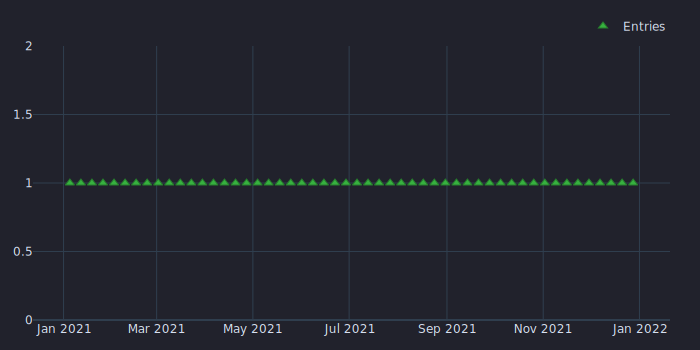

In [80]:
entry_generator.plot(column=(2, 0, "BTCUSDT")).show_svg()

#### Exits

In [81]:
@njit
def exit_place_func_nb(c):
    c.out[0] = True
    return 0

entries = symbol_wrapper.fill(False)
entries.vbt.set(True, every="Q", inplace=True)
entries.index[entries.any(axis=1)]

DatetimeIndex(['2021-03-31 00:00:00+00:00', '2021-06-30 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [82]:
exits = entries.vbt.signals.generate_exits(exit_place_func_nb)
exits.index[exits.any(axis=1)]

DatetimeIndex(['2021-04-01 00:00:00+00:00', '2021-07-01 00:00:00+00:00',
               '2021-10-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [83]:
exits = entries.vbt.signals.generate_exits(
    exit_place_func_nb,
    wait=0
)
exits.index[exits.any(axis=1)]

DatetimeIndex(['2021-03-31 00:00:00+00:00', '2021-06-30 00:00:00+00:00',
               '2021-09-30 00:00:00+00:00', '2021-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [84]:
@njit
def exit_place_func_nb(c, index, wait_td):
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        if index[i] >= index[c.from_i] + wait_td:
            c.out[out_i] = True
            last_i = out_i
            break
    return last_i

exits = entries.vbt.signals.generate_exits(
    exit_place_func_nb,
    entries.index.values.astype(np.int64),
    pd.Timedelta("7d").value,
    wait=0
)
exits.index[exits.any(axis=1)]

DatetimeIndex(['2021-04-07 00:00:00+00:00', '2021-07-07 00:00:00+00:00',
               '2021-10-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [85]:
entries = symbol_wrapper.fill(False)
entries.vbt.set(True, every="5d", inplace=True)
exits = entries.vbt.signals.generate_exits(
    exit_place_func_nb,
    entries.index.values.astype(np.int64),
    pd.Timedelta("7d").value,
    wait=0
)
exits.index[exits.any(axis=1)]

DatetimeIndex([], dtype='datetime64[ns, UTC]', name='Open time', freq='D')

In [86]:
exits = entries.vbt.signals.generate_exits(
    exit_place_func_nb,
    entries.index.values.astype(np.int64),
    pd.Timedelta("7d").value,
    wait=0,
    until_next=False
)
exits.index[exits.any(axis=1)]

DatetimeIndex(['2021-01-08 00:00:00+00:00', '2021-01-13 00:00:00+00:00',
               '2021-01-18 00:00:00+00:00', '2021-01-23 00:00:00+00:00',
               '2021-01-28 00:00:00+00:00', '2021-02-02 00:00:00+00:00',
               '2021-02-07 00:00:00+00:00', '2021-02-12 00:00:00+00:00',
               '2021-02-17 00:00:00+00:00', '2021-02-22 00:00:00+00:00',
               '2021-02-27 00:00:00+00:00', '2021-03-04 00:00:00+00:00',
               '2021-03-09 00:00:00+00:00', '2021-03-14 00:00:00+00:00',
               '2021-03-19 00:00:00+00:00', '2021-03-24 00:00:00+00:00',
               '2021-03-29 00:00:00+00:00', '2021-04-03 00:00:00+00:00',
               '2021-04-08 00:00:00+00:00', '2021-04-13 00:00:00+00:00',
               '2021-04-18 00:00:00+00:00', '2021-04-23 00:00:00+00:00',
               '2021-04-28 00:00:00+00:00', '2021-05-03 00:00:00+00:00',
               '2021-05-08 00:00:00+00:00', '2021-05-13 00:00:00+00:00',
               '2021-05-18 00:00:00+00:00', '2021-0

In [87]:
exits = entries.vbt.signals.generate_exits(
    exit_place_func_nb,
    entries.index.values.astype(np.int64),
    pd.Timedelta("7d").value,
    wait=0,
    until_next=False,
    skip_until_exit=True
)
exits.index[exits.any(axis=1)]

DatetimeIndex(['2021-01-08 00:00:00+00:00', '2021-01-18 00:00:00+00:00',
               '2021-01-28 00:00:00+00:00', '2021-02-07 00:00:00+00:00',
               '2021-02-17 00:00:00+00:00', '2021-02-27 00:00:00+00:00',
               '2021-03-09 00:00:00+00:00', '2021-03-19 00:00:00+00:00',
               '2021-03-29 00:00:00+00:00', '2021-04-08 00:00:00+00:00',
               '2021-04-18 00:00:00+00:00', '2021-04-28 00:00:00+00:00',
               '2021-05-08 00:00:00+00:00', '2021-05-18 00:00:00+00:00',
               '2021-05-28 00:00:00+00:00', '2021-06-07 00:00:00+00:00',
               '2021-06-17 00:00:00+00:00', '2021-06-27 00:00:00+00:00',
               '2021-07-07 00:00:00+00:00', '2021-07-17 00:00:00+00:00',
               '2021-07-27 00:00:00+00:00', '2021-08-06 00:00:00+00:00',
               '2021-08-16 00:00:00+00:00', '2021-08-26 00:00:00+00:00',
               '2021-09-05 00:00:00+00:00', '2021-09-15 00:00:00+00:00',
               '2021-09-25 00:00:00+00:00', '2021-1

In [88]:
@njit
def exit_place_func_nb(c, wait_td, index):
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        if index[i] >= index[c.from_i] + wait_td:
            c.out[out_i] = True
            last_i = out_i
            break
    return last_i

ExitGenerator = vbt.SignalFactory(
    mode="exits",
    param_names=["wait_td"]
).with_place_func(
    exit_place_func=exit_place_func_nb,
    exit_settings=dict(
        pass_params=["wait_td"],
    ),
    var_args=True,
    wait=0,
    until_next=False,
    skip_until_exit=True,
    param_settings=dict(
        wait_td=dict(
            post_index_func=lambda x: x.map(lambda y: str(pd.Timedelta(y)))
        )
    ),
)
exit_generator = ExitGenerator.run(
    entries,
    [
        pd.Timedelta("3d").to_timedelta64(),
        pd.Timedelta("7d").to_timedelta64()
    ],
    symbol_wrapper.index.values
)
exit_generator.exits.sum()

custom_wait_td   symbol 
3 days 00:00:00  BTCUSDT    73
                 ETHUSDT    73
7 days 00:00:00  BTCUSDT    36
                 ETHUSDT    36
dtype: int64

In [89]:
new_entries = exit_generator.entries.vbt.signals.first(
    reset_by=exit_generator.exits,
    allow_gaps=True, 
)
new_entries.index[new_entries[("7 days 00:00:00", "BTCUSDT")]]

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-11 00:00:00+00:00',
               '2021-01-21 00:00:00+00:00', '2021-01-31 00:00:00+00:00',
               '2021-02-10 00:00:00+00:00', '2021-02-20 00:00:00+00:00',
               '2021-03-02 00:00:00+00:00', '2021-03-12 00:00:00+00:00',
               '2021-03-22 00:00:00+00:00', '2021-04-01 00:00:00+00:00',
               '2021-04-11 00:00:00+00:00', '2021-04-21 00:00:00+00:00',
               '2021-05-01 00:00:00+00:00', '2021-05-11 00:00:00+00:00',
               '2021-05-21 00:00:00+00:00', '2021-05-31 00:00:00+00:00',
               '2021-06-10 00:00:00+00:00', '2021-06-20 00:00:00+00:00',
               '2021-06-30 00:00:00+00:00', '2021-07-10 00:00:00+00:00',
               '2021-07-20 00:00:00+00:00', '2021-07-30 00:00:00+00:00',
               '2021-08-09 00:00:00+00:00', '2021-08-19 00:00:00+00:00',
               '2021-08-29 00:00:00+00:00', '2021-09-08 00:00:00+00:00',
               '2021-09-18 00:00:00+00:00', '2021-0

#### Both

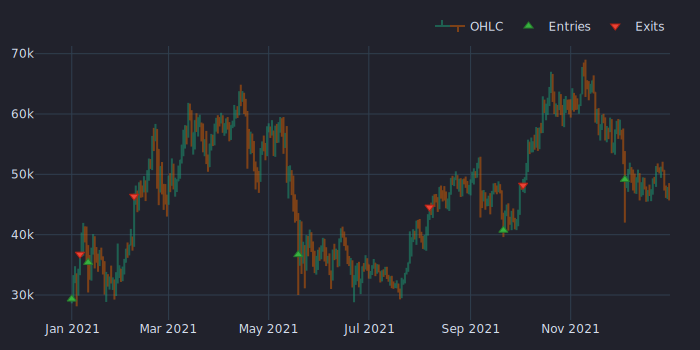

In [90]:
@njit
def entry_place_func_nb(c, low, close, th):
    if c.from_i == 0:
        c.out[0] = True
        return 0
    exit_price = close[c.from_i - c.wait, c.col]
    hit_price = exit_price * (1 - th)
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        if low[i, c.col] <= hit_price:
            c.out[out_i] = True
            last_i = out_i
            break
    return last_i

@njit
def exit_place_func_nb(c, high, close, th):
    entry_price = close[c.from_i - c.wait, c.col]
    hit_price = entry_price * (1 + th)
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        if high[i, c.col] >= hit_price:
            c.out[out_i] = True
            last_i = out_i
            break
    return last_i

entries, exits = vbt.pd_acc.signals.generate_both(
    symbol_wrapper.shape,
    entry_place_func_nb=entry_place_func_nb,
    entry_args=(vbt.Rep("low"), vbt.Rep("close"), 0.1),
    exit_place_func_nb=exit_place_func_nb,
    exit_args=(vbt.Rep("high"), vbt.Rep("close"), 0.2),
    wrapper=symbol_wrapper,
    broadcast_named_args=dict(
        high=data.get("High"),
        low=data.get("Low"),
        close=data.get("Close")
    ),
    broadcast_kwargs=dict(
        post_func=vbt.to_2d_array
    )
)

fig = data.plot(
    symbol="BTCUSDT", 
    ohlc_trace_kwargs=dict(opacity=0.5), 
    plot_volume=False
)
entries["BTCUSDT"].vbt.signals.plot_as_entries(
    y=data.get("Close", "BTCUSDT"), fig=fig)
exits["BTCUSDT"].vbt.signals.plot_as_exits(
    y=data.get("Close", "BTCUSDT"), fig=fig)
fig.show_svg()

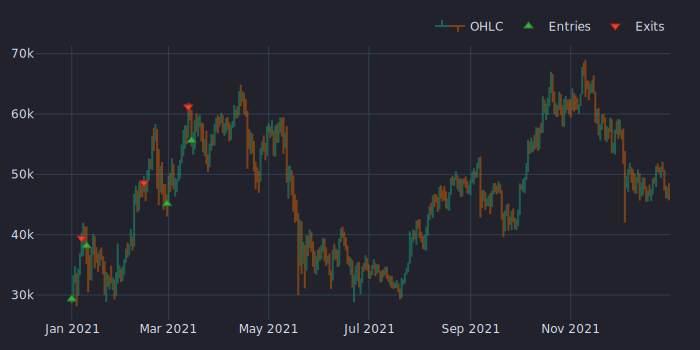

In [91]:
BothGenerator = vbt.SignalFactory(
    mode="both",
    input_names=["high", "low", "close"],
    param_names=["entry_th", "exit_th"]
).with_place_func(
    entry_place_func=entry_place_func_nb,
    entry_settings=dict(
        pass_inputs=["low", "close"],
        pass_params=["entry_th"],
    ),
    exit_place_func=exit_place_func_nb,
    exit_settings=dict(
        pass_inputs=["high", "close"],
        pass_params=["exit_th"],
    )
)
both_generator = BothGenerator.run(
    data.get("High"),
    data.get("Low"),
    data.get("Close"),
    [0.1, 0.2],
    [0.2, 0.3],
    param_product=True
)
fig = data.plot(
    symbol="BTCUSDT", 
    ohlc_trace_kwargs=dict(opacity=0.5), 
    plot_volume=False
)
both_generator.plot(
    column=(0.1, 0.3, "BTCUSDT"), 
    entry_y=data.get("Close", "BTCUSDT"), 
    exit_y=data.get("Close", "BTCUSDT"), 
    fig=fig
).show_svg()

#### Chained exits

In [92]:
@njit
def exit_place_func_nb(c, low, request_price, fill_price_out):
    _request_price = request_price[c.from_i - c.wait, c.col]
    last_i = -1
    for out_i in range(len(c.out)):
        i = c.from_i + out_i
        if low[i, c.col] <= _request_price:
            fill_price_out[i, c.col] = _request_price
            c.out[out_i] = True
            last_i = out_i
            break
    return last_i

ChainGenerator = vbt.SignalFactory(
    mode="chain",
    input_names=["low", "request_price"],
    in_output_names=["fill_price_out"]
).with_place_func(
    exit_place_func=exit_place_func_nb,
    exit_settings=dict(
        pass_inputs=["low", "request_price"],
        pass_in_outputs=["fill_price_out"],
    ),
    fill_price_out=np.nan
)

In [93]:
fast_ma = vbt.talib("SMA").run(
    data.get("Close"), 
    vbt.Default(10), 
    short_name="fast_ma"
)
slow_ma = vbt.talib("SMA").run(
    data.get("Close"), 
    vbt.Default(20), 
    short_name="slow_ma"
)
entries = fast_ma.real_crossed_above(slow_ma)
entries.sum()

symbol
BTCUSDT    10
ETHUSDT     8
dtype: int64

In [94]:
chain_generator = ChainGenerator.run(
    entries,
    data.get("Low"),
    data.get("Close") * (1 - 0.1)
)
request_mask = chain_generator.new_entries
request_mask.sum()

symbol
BTCUSDT    4
ETHUSDT    5
dtype: int64

In [95]:
request_price = chain_generator.request_price
print(request_price[request_mask.any(axis=1)])

symbol                       BTCUSDT   ETHUSDT
Open time                                     
2021-02-04 00:00:00+00:00  33242.994  1436.103
2021-03-11 00:00:00+00:00  51995.844  1643.202
2021-04-02 00:00:00+00:00  53055.009  1920.321
2021-06-07 00:00:00+00:00  30197.511  2332.845
2021-06-15 00:00:00+00:00  36129.636  2289.186
2021-07-05 00:00:00+00:00  30321.126  1976.877
2021-07-06 00:00:00+00:00  30798.009  2090.250
2021-07-27 00:00:00+00:00  35512.083  2069.541


In [96]:
fill_mask = chain_generator.exits
fill_mask.sum()

symbol
BTCUSDT    3
ETHUSDT    4
dtype: int64

In [97]:
fill_price = chain_generator.fill_price_out
print(fill_price[fill_mask.any(axis=1)])

symbol                       BTCUSDT   ETHUSDT
Open time                                     
2021-03-24 00:00:00+00:00        NaN  1643.202
2021-05-19 00:00:00+00:00  33242.994  1920.321
2021-06-08 00:00:00+00:00        NaN  2332.845
2021-06-18 00:00:00+00:00  36129.636       NaN
2021-07-13 00:00:00+00:00        NaN  1976.877
2021-07-19 00:00:00+00:00  30798.009       NaN


### Preset generators

#### Random

In [98]:
btcusdt_wrapper = symbol_wrapper["BTCUSDT"]
mask = vbt.pd_acc.signals.generate_random(
    btcusdt_wrapper.shape,
    prob=1 / 10,
    wrapper=btcusdt_wrapper,
    seed=42
)
mask_index = mask.index[mask]
(mask_index[1:] - mask_index[:-1]).mean()

Timedelta('8 days 03:20:55.813953488')

In [99]:
monday_mask = btcusdt_wrapper.fill(False)
monday_mask.vbt.set(True, every="W-MON", inplace=True)
mask = monday_mask.vbt.signals.generate_random_exits(wait=0)
mask_index = mask.index[mask]
mask_index.strftime("%W %A")

Index(['01 Wednesday', '02 Monday', '03 Monday', '04 Tuesday', '05 Wednesday',
       '06 Thursday', '07 Friday', '08 Friday', '09 Thursday', '10 Sunday',
       '11 Saturday', '12 Tuesday', '13 Friday', '14 Wednesday', '15 Tuesday',
       '16 Wednesday', '17 Sunday', '18 Monday', '19 Tuesday', '20 Friday',
       '21 Tuesday', '22 Tuesday', '23 Tuesday', '24 Saturday', '25 Tuesday',
       '26 Wednesday', '27 Monday', '28 Sunday', '29 Thursday', '30 Tuesday',
       '31 Friday', '32 Tuesday', '33 Friday', '34 Wednesday', '35 Friday',
       '36 Thursday', '37 Monday', '38 Friday', '39 Friday', '40 Monday',
       '41 Thursday', '42 Tuesday', '43 Friday', '44 Monday', '45 Wednesday',
       '46 Monday', '47 Wednesday', '48 Thursday', '49 Tuesday', '50 Monday',
       '51 Sunday', '52 Friday'],
      dtype='object', name='Open time')

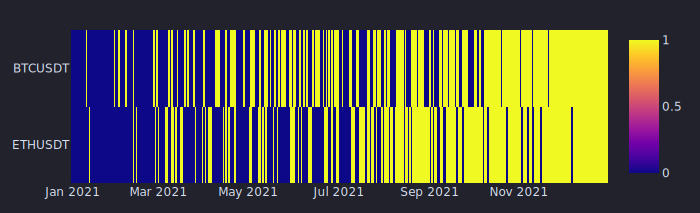

In [100]:
prob = np.linspace(0, 1, len(symbol_wrapper.index))
rprob = vbt.RPROB.run(
    symbol_wrapper.shape,
    vbt.Default(vbt.to_per_row_array(prob)),
    seed=42,
    input_index=symbol_wrapper.index,
    input_columns=symbol_wrapper.columns
)
rprob.entries.astype(int).vbt.ts_heatmap().show_svg()

In [101]:
rprob = vbt.RPROB.run(
    symbol_wrapper.shape,
    [0.5, vbt.to_per_row_array(prob)],
    seed=42,
    input_index=symbol_wrapper.index,
    input_columns=symbol_wrapper.columns
)
rprob.entries.sum()

rprob_prob  symbol 
0.5         BTCUSDT    176
            ETHUSDT    187
array_0     BTCUSDT    183
            ETHUSDT    178
dtype: int64

#### Stops

In [102]:
new_entries, exits = entries.vbt.signals.generate_stop_exits(
    data.get("Close"),
    data.get("High"),
    stop=0.1,
    chain=True
)
print(new_entries[new_entries.any(axis=1)])

symbol                     BTCUSDT  ETHUSDT
Open time                                  
2021-02-04 00:00:00+00:00     True    False
2021-03-10 00:00:00+00:00     True    False
2021-03-11 00:00:00+00:00    False     True
2021-04-03 00:00:00+00:00     True    False
2021-05-05 00:00:00+00:00     True    False
2021-06-07 00:00:00+00:00    False     True
2021-10-05 00:00:00+00:00    False     True
2021-11-07 00:00:00+00:00     True    False
2021-12-02 00:00:00+00:00    False     True


In [103]:
print(exits[exits.any(axis=1)])

symbol                     BTCUSDT  ETHUSDT
Open time                                  
2021-02-06 00:00:00+00:00     True    False
2021-03-13 00:00:00+00:00     True    False
2021-04-02 00:00:00+00:00    False     True
2021-04-13 00:00:00+00:00     True    False
2021-08-06 00:00:00+00:00    False     True
2021-10-15 00:00:00+00:00    False     True
2021-10-19 00:00:00+00:00     True    False


In [104]:
out_dict = {}
new_entries, exits = entries.vbt.signals.generate_stop_exits(
    data.get("Close"),
    data.get("High"),
    stop=0.1,
    chain=True,
    out_dict=out_dict
)
print(out_dict["stop_ts"][exits.any(axis=1)])

symbol                       BTCUSDT   ETHUSDT
Open time                                     
2021-02-06 00:00:00+00:00  40630.326       NaN
2021-03-13 00:00:00+00:00  61436.749       NaN
2021-04-02 00:00:00+00:00        NaN  2008.358
2021-04-13 00:00:00+00:00  62757.134       NaN
2021-08-06 00:00:00+00:00        NaN  2851.255
2021-10-15 00:00:00+00:00        NaN  3866.797
2021-10-19 00:00:00+00:00  63179.721       NaN


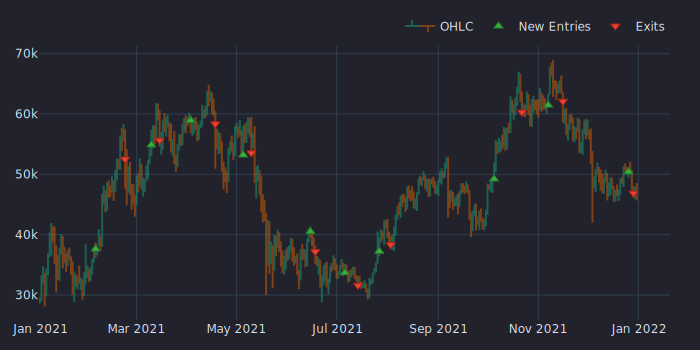

In [105]:
stcx = vbt.STCX.run(
    entries,
    data.get("Open"),
    ts=data.get("Low"),
    follow_ts=data.get("High"),
    stop=-0.1,
    trailing=[False, True],
    wait=0
)
fig = data.plot(
    symbol="BTCUSDT", 
    ohlc_trace_kwargs=dict(opacity=0.5), 
    plot_volume=False
)
stcx.plot(
    column=(-0.1, True, "BTCUSDT"), 
    entry_y="entry_ts",
    exit_y="stop_ts", 
    fig=fig
).show_svg()

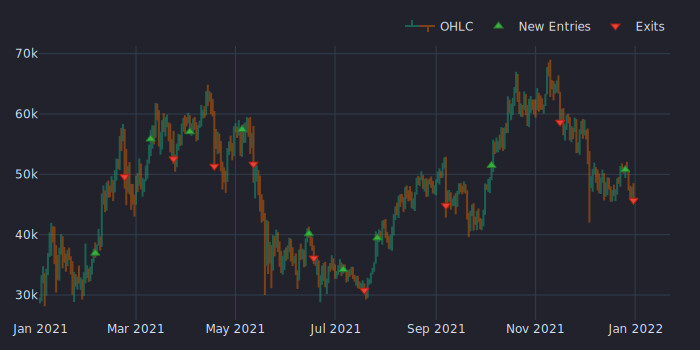

In [106]:
ohlcstcx = vbt.OHLCSTCX.run(
    entries,
    data.get("Close"),
    data.get("Open"),
    data.get("High"),
    data.get("Low"),
    data.get("Close"),
    sl_stop=vbt.Default(0.1),
    tsl_stop=vbt.Default(0.15),
    is_entry_open=False
)
ohlcstcx.plot(column=("BTCUSDT")).show_svg()

In [107]:
print(ohlcstcx.stop_type_readable[ohlcstcx.exits.any(axis=1)])

symbol                    BTCUSDT ETHUSDT
Open time                                
2021-02-22 00:00:00+00:00     TSL    None
2021-03-23 00:00:00+00:00    None     TSL
2021-03-24 00:00:00+00:00     TSL    None
2021-04-18 00:00:00+00:00      SL     TSL
2021-05-12 00:00:00+00:00      SL    None
2021-06-08 00:00:00+00:00    None      SL
2021-06-18 00:00:00+00:00      SL    None
2021-07-09 00:00:00+00:00    None     TSL
2021-07-19 00:00:00+00:00      SL    None
2021-09-07 00:00:00+00:00     TSL     TSL
2021-11-16 00:00:00+00:00     TSL     TSL
2021-12-03 00:00:00+00:00    None      SL
2021-12-29 00:00:00+00:00    None      SL
2021-12-31 00:00:00+00:00      SL    None


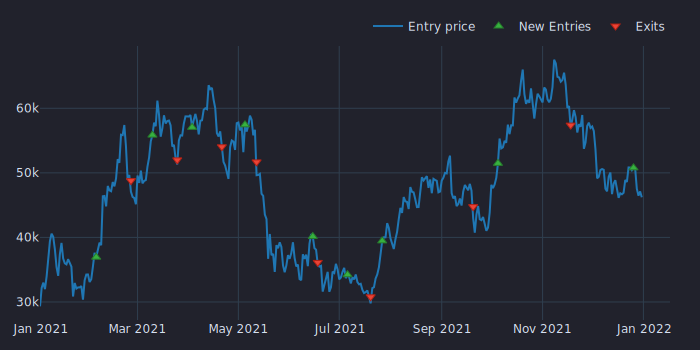

In [108]:
ohlcstcx = vbt.OHLCSTCX.run(
    entries,
    data.get("Close"),
    sl_stop=vbt.Default(0.1),
    tsl_stop=vbt.Default(0.15),
    is_entry_open=False
)
ohlcstcx.plot(column=("BTCUSDT")).show_svg()

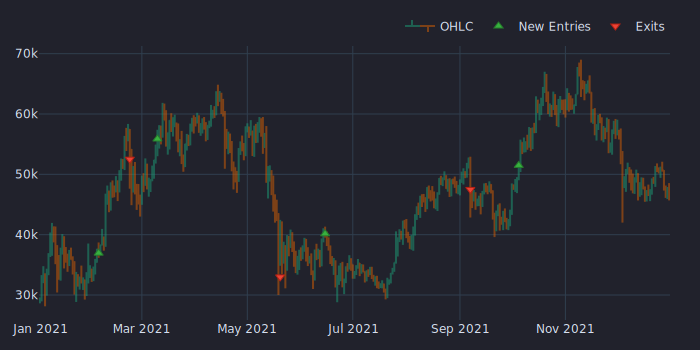

In [109]:
entry_pos_rank = entries.vbt.signals.pos_rank(allow_gaps=True)
short_entries = (entry_pos_rank >= 0) & (entry_pos_rank % 2 == 1)

ohlcstcx = vbt.OHLCSTCX.run(
    entries,
    data.get("Close"),
    data.get("Open"),
    data.get("High"),
    data.get("Low"),
    data.get("Close"),
    tsl_th=vbt.Default(0.2),
    tsl_stop=vbt.Default(0.1),
    reverse=vbt.Default(short_entries),
    is_entry_open=False
)
ohlcstcx.plot(column=("BTCUSDT")).show_svg()

In [110]:
long_entries = ohlcstcx.new_entries.vbt & (~short_entries)
long_exits = ohlcstcx.exits.vbt.signals.first_after(long_entries)
short_entries = ohlcstcx.new_entries.vbt & short_entries
short_exits = ohlcstcx.exits.vbt.signals.first_after(short_entries)

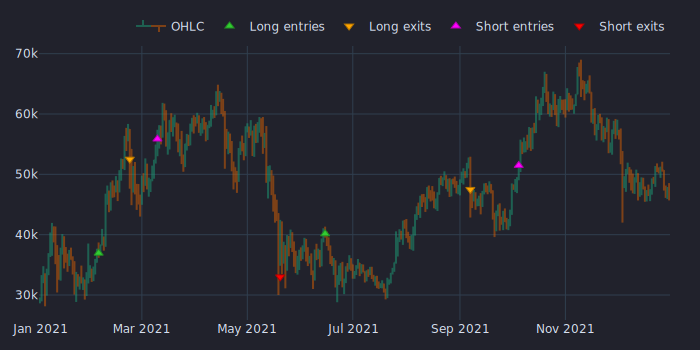

In [111]:
fig = data.plot(
    symbol="BTCUSDT", 
    ohlc_trace_kwargs=dict(opacity=0.5), 
    plot_volume=False
)
long_entries["BTCUSDT"].vbt.signals.plot_as_entries(
    ohlcstcx.entry_price["BTCUSDT"],
    trace_kwargs=dict(marker=dict(color="limegreen"), name="Long entries"), 
    fig=fig
)
long_exits["BTCUSDT"].vbt.signals.plot_as_exits(
    ohlcstcx.stop_price["BTCUSDT"],
    trace_kwargs=dict(marker=dict(color="orange"), name="Long exits"),
    fig=fig
)
short_entries["BTCUSDT"].vbt.signals.plot_as_entries(
    ohlcstcx.entry_price["BTCUSDT"],
    trace_kwargs=dict(marker=dict(color="magenta"), name="Short entries"),
    fig=fig
)
short_exits["BTCUSDT"].vbt.signals.plot_as_exits(
    ohlcstcx.stop_price["BTCUSDT"],
    trace_kwargs=dict(marker=dict(color="red"), name="Short exits"),
    fig=fig
).show_svg()

## Pre-analysis

### Ranking

In [112]:
@njit
def rank_func_nb(c):
    if c.sig_in_part_cnt == 1:
        return 1
    return 0

sample_mask = pd.Series([True, True, False, True, True])
ranked = sample_mask.vbt.signals.rank(rank_func_nb)
ranked

0    1
1    0
2   -1
3    1
4    0
dtype: int64

In [113]:
ranked == 1

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [114]:
ranked = sample_mask.vbt.signals.rank(rank_func_nb, after_false=True)
ranked == 1

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [115]:
sample_entries = pd.Series([True, True, True, True, True])
sample_exits = pd.Series([False, False, True, False, False])
ranked = sample_entries.vbt.signals.rank(
    rank_func_nb, 
    reset_by=sample_exits
)
ranked == 1

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [116]:
ranked = sample_entries.vbt.signals.rank(
    rank_func_nb, 
    reset_by=sample_exits,
    after_reset=True
)
ranked == 1

0    False
1    False
2    False
3     True
4    False
dtype: bool

#### Preset rankers

In [117]:
sample_mask = pd.Series([True, True, False, True, True])
ranked = sample_mask.vbt.signals.pos_rank()
ranked

0    0
1    1
2   -1
3    0
4    1
dtype: int64

In [118]:
ranked == 1

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [119]:
ranked = sample_mask.vbt.signals.pos_rank(allow_gaps=True)
ranked

0    0
1    1
2   -1
3    2
4    3
dtype: int64

In [120]:
(ranked > -1) & (ranked % 2 == 1)

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [121]:
ranked = sample_mask.vbt.signals.partition_pos_rank(allow_gaps=True)
ranked

0    0
1    0
2   -1
3    1
4    1
dtype: int64

In [122]:
ranked == 1

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [123]:
entry_cond1 = data.get("Low") < bb.lowerband
entry_cond2 = bandwidth > 0.3
entry_cond3 = data.get("High") > bb.upperband
entry_cond4 = bandwidth < 0.15
entries = (entry_cond1 & entry_cond2) | (entry_cond3 & entry_cond4)

entries.vbt.signals.from_nth(0).sum()

symbol
BTCUSDT    25
ETHUSDT    13
dtype: int64

In [124]:
entries.vbt.signals.from_nth(1).sum()

symbol
BTCUSDT    14
ETHUSDT     5
dtype: int64

In [125]:
entries.vbt.signals.from_nth(2).sum()

symbol
BTCUSDT    6
ETHUSDT    2
dtype: int64

In [126]:
exit_cond1 = data.get("High") > bb.upperband
exit_cond2 = bandwidth > 0.3
exit_cond3 = data.get("Low") < bb.lowerband
exit_cond4 = bandwidth < 0.15
exits = (exit_cond1 & exit_cond2) | (exit_cond3 & exit_cond4)

In [127]:
exits.vbt.signals.pos_rank_after(entries, reset_wait=0).max() + 1

symbol
BTCUSDT     9
ETHUSDT    11
dtype: int64

In [128]:
entries.vbt.signals.pos_rank_after(exits).max() + 1

symbol
BTCUSDT    11
ETHUSDT     7
dtype: int64

In [129]:
ranked = exits.vbt.signals.pos_rank_after(entries, reset_wait=0)
highest_ranked = ranked == ranked.max()
print(ranked[highest_ranked.any(axis=1)])

symbol                     BTCUSDT  ETHUSDT
Open time                                  
2021-05-12 00:00:00+00:00       -1       10
2021-07-28 00:00:00+00:00        8       -1


In [130]:
exits_after = exits.vbt.signals.from_nth_after(0, entries, reset_wait=0)
(exits ^ exits_after).sum()

symbol
BTCUSDT    10
ETHUSDT     4
dtype: int64

#### Mapped ranks

In [131]:
mask = bandwidth.vbt > pd.Index(np.arange(1, 10) / 10, name="bw_th")
mapped_ranks = mask.vbt.signals.pos_rank(as_mapped=True)
mapped_ranks.max(group_by=vbt.ExceptLevel("symbol"))

bw_th
0.1    237.0
0.2     50.0
0.3     19.0
0.4     12.0
0.5     10.0
0.6      8.0
0.7      5.0
0.8      2.0
0.9      NaN
Name: max, dtype: float64

### Cleaning

In [132]:
new_exits = exits.vbt.signals.first_after(entries, reset_wait=0)
new_entries = entries.vbt.signals.first_after(exits)

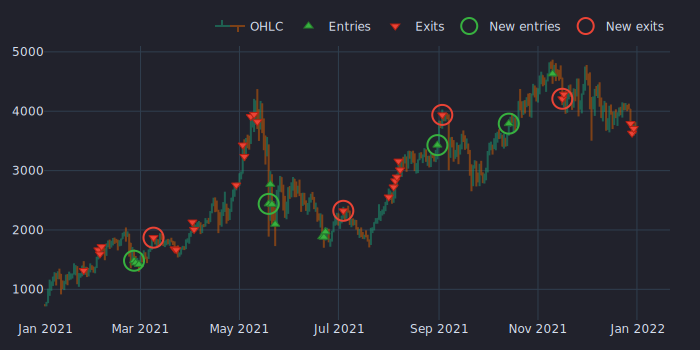

In [133]:
symbol = "ETHUSDT"
fig = data.plot(
    symbol=symbol, 
    ohlc_trace_kwargs=dict(opacity=0.5), 
    plot_volume=False
)
entries[symbol].vbt.signals.plot_as_entries(
    y=data.get("Close", symbol), fig=fig)
exits[symbol].vbt.signals.plot_as_exits(
    y=data.get("Close", symbol), fig=fig)
new_entries[symbol].vbt.signals.plot_as_entry_marks(
    y=data.get("Close", symbol), fig=fig, 
    trace_kwargs=dict(name="New entries"))
new_exits[symbol].vbt.signals.plot_as_exit_marks(
    y=data.get("Close", symbol), fig=fig, 
    trace_kwargs=dict(name="New exits")).show_svg()

In [134]:
new_entries, new_exits = entries.vbt.signals.clean(exits)

### Duration

In [135]:
ranges = entries.vbt.signals.between_ranges()
print(ranges.records)

    id  col  start_idx  end_idx  status
0    0    0         99      100       1
1    1    0        100      101       1
2    2    0        101      102       1
3    3    0        102      103       1
4    4    0        103      135       1
5    5    0        135      136       1
6    6    0        136      138       1
7    7    0        138      139       1
8    8    0        139      140       1
9    9    0        140      142       1
10  10    0        142      231       1
11  11    0        231      232       1
12  12    0        232      234       1
13  13    0        234      244       1
14  14    0        244      245       1
15  15    0        245      247       1
16  16    0        247      248       1
17  17    0        248      249       1
18  18    0        249      311       1
19  19    0        311      312       1
20  20    0        312      313       1
21  21    0        313      356       1
22  22    0        356      357       1
23  23    0        357      360       1


In [136]:
ranges.start_idx.min(wrap_kwargs=dict(to_index=True))

symbol
BTCUSDT   2021-04-10 00:00:00+00:00
ETHUSDT   2021-02-25 00:00:00+00:00
Name: min, dtype: datetime64[ns, UTC]

In [137]:
print(ranges.duration.describe(wrap_kwargs=dict(to_timedelta=True)))

symbol                    BTCUSDT                    ETHUSDT
mean             10 days 21:00:00           21 days 12:00:00
std    22 days 18:47:41.748587504 28 days 19:32:48.777556028
min               1 days 00:00:00            1 days 00:00:00
25%               1 days 00:00:00            1 days 00:00:00
50%               1 days 00:00:00            2 days 00:00:00
75%               2 days 06:00:00           32 days 18:00:00
max              89 days 00:00:00           80 days 00:00:00


In [138]:
ranges = entries.vbt.signals.between_ranges(other=exits)
ranges.avg_duration

symbol
BTCUSDT   39 days 08:00:00
ETHUSDT   39 days 20:00:00
Name: avg_duration, dtype: timedelta64[ns]

In [139]:
new_ranges = new_entries.vbt.signals.between_ranges(other=new_exits)
new_ranges.avg_duration

symbol
BTCUSDT   43 days 00:00:00
ETHUSDT   23 days 12:00:00
Name: avg_duration, dtype: timedelta64[ns]

In [140]:
ranges = entries.vbt.signals.between_ranges(other=exits, from_other=True)
ranges.avg_duration

symbol
BTCUSDT   37 days 14:10:54.545454545
ETHUSDT   22 days 01:50:46.153846153
Name: avg_duration, dtype: timedelta64[ns]

In [141]:
new_ranges = new_entries.vbt.signals.between_ranges(other=new_exits, from_other=True)
new_ranges.avg_duration

symbol
BTCUSDT   43 days 00:00:00
ETHUSDT   23 days 12:00:00
Name: avg_duration, dtype: timedelta64[ns]

In [142]:
ranges = entries.vbt.signals.partition_ranges()
print(ranges.duration.describe())

symbol    BTCUSDT   ETHUSDT
count   11.000000  8.000000
mean     2.272727  1.625000
std      1.190874  0.916125
min      1.000000  1.000000
25%      1.500000  1.000000
50%      2.000000  1.000000
75%      3.000000  2.250000
max      5.000000  3.000000


In [143]:
new_ranges = new_entries.vbt.signals.partition_ranges()
print(new_ranges.duration.describe())

symbol  BTCUSDT  ETHUSDT
count       4.0      4.0
mean        1.0      1.0
std         0.0      0.0
min         1.0      1.0
25%         1.0      1.0
50%         1.0      1.0
75%         1.0      1.0
max         1.0      1.0


In [144]:
ranges = entries.vbt.signals.between_partition_ranges()
print(ranges.duration.describe(wrap_kwargs=dict(to_timedelta=True)))

symbol                    BTCUSDT                    ETHUSDT
mean             24 days 16:48:00 36 days 03:25:42.857142857
std    31 days 00:33:47.619615945 30 days 08:40:17.723113570
min               2 days 00:00:00            2 days 00:00:00
25%               2 days 00:00:00           14 days 12:00:00
50%               6 days 12:00:00           29 days 00:00:00
75%              40 days 06:00:00           56 days 12:00:00
max              89 days 00:00:00           80 days 00:00:00


### Overview

In [145]:
entries.vbt.signals.stats(column="BTCUSDT")

Start                         2021-01-01 00:00:00+00:00
End                           2021-12-31 00:00:00+00:00
Period                                365 days 00:00:00
Total                                                25
Rate [%]                                       6.849315
First Index                   2021-04-10 00:00:00+00:00
Last Index                    2021-12-27 00:00:00+00:00
Norm Avg Index [-1, 1]                         0.159121
Distance: Min                           1 days 00:00:00
Distance: Median                        1 days 00:00:00
Distance: Max                          89 days 00:00:00
Total Partitions                                     11
Partition Rate [%]                                 44.0
Partition Length: Min                   1 days 00:00:00
Partition Length: Median                2 days 00:00:00
Partition Length: Max                   5 days 00:00:00
Partition Distance: Min                 2 days 00:00:00
Partition Distance: Median              6 days 1

In [146]:
entries.vbt.signals.stats(column="BTCUSDT", settings=dict(other=exits))

Start                         2021-01-01 00:00:00+00:00
End                           2021-12-31 00:00:00+00:00
Period                                365 days 00:00:00
Total                                                25
Rate [%]                                       6.849315
Total Overlapping                                     1
Overlapping Rate [%]                           1.923077
First Index                   2021-04-10 00:00:00+00:00
Last Index                    2021-12-27 00:00:00+00:00
Norm Avg Index [-1, 1]                         0.159121
Distance -> Other: Min                  0 days 00:00:00
Distance -> Other: Median              49 days 00:00:00
Distance -> Other: Max                 66 days 00:00:00
Total Partitions                                     11
Partition Rate [%]                                 44.0
Partition Length: Min                   1 days 00:00:00
Partition Length: Median                2 days 00:00:00
Partition Length: Max                   5 days 0